# SentenceTextProcessing_Normalisation


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


import re
from nltk.corpus import stopwords

In [2]:
from nltk import FreqDist

In [3]:
# Custom ProcessingAndNor.ipynb module to perform PreProcessing and Normalisation for Function reuse
%run ProcessingAndNorm.ipynb

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yash.hemnani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yash.hemnani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading the Sentences Cleaned Dot New Line. CSV

In [4]:
df_sc = pd.read_csv('SentencesCleanedDotNewLine.csv', index_col = [0])

In [5]:
df_sc.head()

,Sentences,Char_Count
0,Dubai Building Code 2021 Edition Contents Part...,1140
1,The content of the DBC is based on the followi...,402
2,The DBC is arranged under themes to integrate ...,288
3,A 2 Dubai Building Code Part A: General A.2 De...,191
4,A.2.1 Terms Addition: Increase to a building’s...,98


Text(0.5, 1.0, 'Null values in given data')

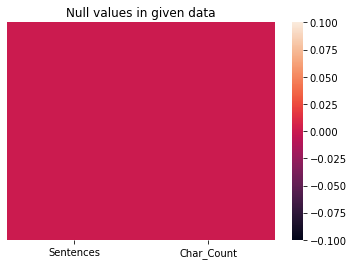

In [6]:
#Heatmap to check null/NaN Values
sns.heatmap(df_sc.isnull(),cbar = True, yticklabels = False)
plt.title('Null values in given data')

## Function Definitions

In [7]:
def Calculate_Len_NoOfWords(df):
    df['length'] = df['Sentences'].apply(len)
    df['word_count'] = df['Sentences'].apply(lambda x: len(str(x).split()))
    return df

#Function to plot more frequent terms

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    
    
    #selecting top 20 most frequent words
    
    d = words_df.nlargest(columns = "count", n = terms)
    plt.figure(figsize = (20,5))
    ax = sns.barplot(data = d, x = "word", y = 'count')
    ax.set(ylabel = 'count')
    plt.show()

In [8]:
df_sc = Calculate_Len_NoOfWords(df_sc)
df_sc

,Sentences,Char_Count,length,word_count
0,Dubai Building Code 2021 Edition Contents Part...,1140,1140,181
1,The content of the DBC is based on the followi...,402,402,53
2,The DBC is arranged under themes to integrate ...,288,288,47
3,A 2 Dubai Building Code Part A: General A.2 De...,191,191,33
4,A.2.1 Terms Addition: Increase to a building’s...,98,98,16
...,...,...,...,...
5419,"As a minimum, occupancy sensors shall be provi...",325,325,47
5420,K.10.5 Fire safety systems Emergency lighting ...,190,190,28
5421,"Fire detection and alarm K.10.5.2 Table 8.13, ...",232,232,41
5422,The fire alarm control panel or the monitoring...,246,246,38


In [9]:
del df_sc['Char_Count']
df_sc.head()

,Sentences,length,word_count
0,Dubai Building Code 2021 Edition Contents Part...,1140,181
1,The content of the DBC is based on the followi...,402,53
2,The DBC is arranged under themes to integrate ...,288,47
3,A 2 Dubai Building Code Part A: General A.2 De...,191,33
4,A.2.1 Terms Addition: Increase to a building’s...,98,16


## Processing Experiments

In [10]:
df_sc_copy = df_sc.copy()

In [11]:
df_sc_copy.head()

,Sentences,length,word_count
0,Dubai Building Code 2021 Edition Contents Part...,1140,181
1,The content of the DBC is based on the followi...,402,53
2,The DBC is arranged under themes to integrate ...,288,47
3,A 2 Dubai Building Code Part A: General A.2 De...,191,33
4,A.2.1 Terms Addition: Increase to a building’s...,98,16


In [12]:
#Check Sample text
df_sc_copy['Sentences'].loc[224]

'Right of way (ROW): Strip of land occupied or intended to be occupied by a road, sidewalk, crosswalk, railroad, electric transmission line, oil or gas pipeline, water line, sanitary storm sewer, and other similar uses; the right of one to pass over the property of another'

In [13]:
df_sc_copy = To_Lower(df_sc_copy, 'Sentences')
df_sc_copy = Calculate_Len_NoOfWords(df_sc_copy)

In [14]:
df_sc_copy['Sentences'].loc[1]

'the content of the dbc is based on the following inputs: 1) existing regulations and technical requirements produced by the various authorities and service providers; 2) interviews with government authorities, service providers, master developers, consultants and other stakeholders to understand gaps or inconsistencies between existing regulations; 3) benchmarking to international and regional codes'

Discussion: We can see that all the upper case has been changed into lower case. The effect can be seen later on when we create a vector representation which will have a smaller dictionary

In [15]:
df_sc_copy

,Sentences,length,word_count
0,dubai building code 2021 edition contents part...,1140,181
1,the content of the dbc is based on the followi...,402,53
2,the dbc is arranged under themes to integrate ...,288,47
3,a 2 dubai building code part a: general a.2 de...,191,33
4,a.2.1 terms addition: increase to a building’s...,98,16
...,...,...,...
5419,"as a minimum, occupancy sensors shall be provi...",325,47
5420,k.10.5 fire safety systems emergency lighting ...,190,28
5421,"fire detection and alarm k.10.5.2 table 8.13, ...",232,41
5422,the fire alarm control panel or the monitoring...,246,38


### Removing Special Characters

In [16]:
df_sc_copy = Remove_Special_Char(df_sc_copy, 'Sentences')
df_sc_copy

C:\Users\yash.hemnani\AppData\Local\Temp\ipykernel_14264\2279212239.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace('[$@#;\\:\[\]\']','')


,Sentences,length,word_count
0,dubai building code 2021 edition contents part...,1140,181
1,the content of the dbc is based on the followi...,402,53
2,the dbc is arranged under themes to integrate ...,288,47
3,a 2 dubai building code part a general a.2 def...,191,33
4,a.2.1 terms addition increase to a building’s ...,98,16
...,...,...,...
5419,"as a minimum, occupancy sensors shall be provi...",325,47
5420,k.10.5 fire safety systems emergency lighting ...,190,28
5421,"fire detection and alarm k.10.5.2 table 8.13, ...",232,41
5422,the fire alarm control panel or the monitoring...,246,38


In [17]:
df_sc_copy = Calculate_Len_NoOfWords(df_sc_copy)

In [18]:
df_sc_copy

,Sentences,length,word_count
0,dubai building code 2021 edition contents part...,1136,181
1,the content of the dbc is based on the followi...,399,53
2,the dbc is arranged under themes to integrate ...,288,47
3,a 2 dubai building code part a general a.2 def...,189,33
4,a.2.1 terms addition increase to a building’s ...,97,16
...,...,...,...
5419,"as a minimum, occupancy sensors shall be provi...",325,47
5420,k.10.5 fire safety systems emergency lighting ...,188,28
5421,"fire detection and alarm k.10.5.2 table 8.13, ...",228,41
5422,the fire alarm control panel or the monitoring...,246,38


In [19]:
df_sc['length'].nlargest(10)

2418    6469
3587    5453
2529    5082
1589    4537
4978    3605
2417    3409
3450    3361
4136    3356
1915    3346
4447    3321
Name: length, dtype: int64

In [20]:
df_sc_copy['length'].nlargest(10)

2418    6459
3587    5443
2529    4867
1589    4516
4978    3463
2417    3406
3450    3360
1915    3339
4136    3336
4447    3318
Name: length, dtype: int64

In [21]:
#Check change in largest 10 review word count to see any effect

df_sc['word_count'].nlargest(10)

2418    952
4210    887
2529    824
3587    757
3159    739
4208    727
1589    716
4212    696
4214    675
3450    666
Name: word_count, dtype: int64

In [22]:
df_sc_copy['word_count'].nlargest(10)

2418    952
4210    887
3587    757
3159    739
4208    727
1589    716
4212    696
4214    675
3450    666
2529    633
Name: word_count, dtype: int64

In [23]:
df_sc

,Sentences,length,word_count
0,Dubai Building Code 2021 Edition Contents Part...,1140,181
1,The content of the DBC is based on the followi...,402,53
2,The DBC is arranged under themes to integrate ...,288,47
3,A 2 Dubai Building Code Part A: General A.2 De...,191,33
4,A.2.1 Terms Addition: Increase to a building’s...,98,16
...,...,...,...
5419,"As a minimum, occupancy sensors shall be provi...",325,47
5420,K.10.5 Fire safety systems Emergency lighting ...,190,28
5421,"Fire detection and alarm K.10.5.2 Table 8.13, ...",232,41
5422,The fire alarm control panel or the monitoring...,246,38


In [24]:
df_sc_copy

,Sentences,length,word_count
0,dubai building code 2021 edition contents part...,1136,181
1,the content of the dbc is based on the followi...,399,53
2,the dbc is arranged under themes to integrate ...,288,47
3,a 2 dubai building code part a general a.2 def...,189,33
4,a.2.1 terms addition increase to a building’s ...,97,16
...,...,...,...
5419,"as a minimum, occupancy sensors shall be provi...",325,47
5420,k.10.5 fire safety systems emergency lighting ...,188,28
5421,"fire detection and alarm k.10.5.2 table 8.13, ...",228,41
5422,the fire alarm control panel or the monitoring...,246,38


In [25]:
df_sc_copy['length_change'] = df_sc['length']-df_sc_copy['length']
df_sc_copy['wordcount_change'] = df_sc['word_count']-df_sc_copy['word_count']

df_sc_copy

,Sentences,length,word_count,length_change,wordcount_change
0,dubai building code 2021 edition contents part...,1136,181,4,0
1,the content of the dbc is based on the followi...,399,53,3,0
2,the dbc is arranged under themes to integrate ...,288,47,0,0
3,a 2 dubai building code part a general a.2 def...,189,33,2,0
4,a.2.1 terms addition increase to a building’s ...,97,16,1,0
...,...,...,...,...,...
5419,"as a minimum, occupancy sensors shall be provi...",325,47,0,0
5420,k.10.5 fire safety systems emergency lighting ...,188,28,2,0
5421,"fire detection and alarm k.10.5.2 table 8.13, ...",228,41,4,0
5422,the fire alarm control panel or the monitoring...,246,38,0,0


In [26]:
print('Average reduction in length per Sentence is', df_sc_copy['length_change'].sum()/(len(df_sc_copy['length_change'])), 'characters')

Average reduction in length per Sentence is 1.611515410958904 characters


In [27]:
df_sc_copy

,Sentences,length,word_count,length_change,wordcount_change
0,dubai building code 2021 edition contents part...,1136,181,4,0
1,the content of the dbc is based on the followi...,399,53,3,0
2,the dbc is arranged under themes to integrate ...,288,47,0,0
3,a 2 dubai building code part a general a.2 def...,189,33,2,0
4,a.2.1 terms addition increase to a building’s ...,97,16,1,0
...,...,...,...,...,...
5419,"as a minimum, occupancy sensors shall be provi...",325,47,0,0
5420,k.10.5 fire safety systems emergency lighting ...,188,28,2,0
5421,"fire detection and alarm k.10.5.2 table 8.13, ...",228,41,4,0
5422,the fire alarm control panel or the monitoring...,246,38,0,0


## Removing Stop Words

In [28]:
#Sample Text

df_sc_copy['Sentences'].loc[1]

'the content of the dbc is based on the following inputs 1) existing regulations and technical requirements produced by the various authorities and service providers 2) interviews with government authorities, service providers, master developers, consultants and other stakeholders to understand gaps or inconsistencies between existing regulations 3) benchmarking to international and regional codes'

In [29]:
stop = stopwords.words('english')

In [30]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
words_not_tobe_removed = ['it', 'its', 'they', 'them', 'themselves', 'their', 'what', 'which', 'this', 'that', 'these', 'those', 'be', 'being', 'have', 'has', 'having',
                         'do', 'does', 'did', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'there', 'by', 'for', 'with', 'about', 'against',
                          'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
                          'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
                          'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', "don't",
                          'should', "should've", 'now', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                          'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't",
                          'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [32]:
final_stop_words = set([word for word in stop if word not in words_not_tobe_removed])

In [34]:
print(final_stop_words)

{'himself', 'theirs', 'is', "you're", 'yourself', 'my', 'been', "you've", 'she', 'd', "that'll", 't', 'our', 'her', 'y', 'had', 's', "you'd", 'i', 'who', 'yours', 're', 'are', 'him', "you'll", 'ours', 'you', 'hers', 'ourselves', 'm', 'me', 'an', "she's", 'o', 'were', 'ma', 'your', 'yourselves', 'myself', 'the', 'whom', 'am', 'll', 'we', 'he', 'a', 'doing', 'was', 've', "it's", 'herself', 'his', 'itself'}


In [38]:
df_sc_copy['Sentences'] = df_sc_copy['Sentences'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stop_words)]))

In [39]:
df_sc_copy = Calculate_Len_NoOfWords(df_sc_copy)
df_sc_copy['Sentences'].loc[1]

'content of dbc based on following inputs 1) existing regulations and technical requirements produced by various authorities and service providers 2) interviews with government authorities, service providers, master developers, consultants and other stakeholders to understand gaps or inconsistencies between existing regulations 3) benchmarking to international and regional codes'

In [40]:
df_sc['length'].nlargest(10)

2418    6469
3587    5453
2529    5082
1589    4537
4978    3605
2417    3409
3450    3361
4136    3356
1915    3346
4447    3321
Name: length, dtype: int64

In [41]:
df_sc_copy['length'].nlargest(10)

2418    6443
3587    5407
2529    4624
1589    4396
2417    3402
3450    3356
4978    3299
4447    3298
1915    3256
4136    3207
Name: length, dtype: int64

In [42]:
#Check change in largest 10 review word count to see any effect

df_sc['word_count'].nlargest(10)

2418    952
4210    887
2529    824
3587    757
3159    739
4208    727
1589    716
4212    696
4214    675
3450    666
Name: word_count, dtype: int64

In [43]:
df_sc_copy['word_count'].nlargest(10)

2418    947
3587    748
1589    683
3159    677
3450    665
2529    613
4210    554
1915    500
2417    480
529     477
Name: word_count, dtype: int64

In [44]:
df_sc_copy['length_change'] = df_sc['length']-df_sc_copy['length']
df_sc_copy['wordcount_change'] = df_sc['word_count']-df_sc_copy['word_count']

df_sc_copy

,Sentences,length,word_count,length_change,wordcount_change
0,dubai building code 2021 edition contents part...,1076,163,64,18
1,content of dbc based on following inputs 1) ex...,380,48,22,5
2,dbc arranged under themes to integrate all rel...,251,37,37,10
3,2 dubai building code part general a.2 definit...,179,29,12,4
4,a.2.1 terms addition increase to building’s gr...,95,15,3,1
...,...,...,...,...,...
5419,"as minimum, occupancy sensors shall be provide...",320,45,5,2
5420,k.10.5 fire safety systems emergency lighting ...,188,28,2,0
5421,"fire detection and alarm k.10.5.2 table 8.13, ...",222,39,10,2
5422,fire alarm control panel or monitoring panel s...,222,32,24,6


In [45]:
print('Average reduction in length per Sentence is', df_sc_copy['length_change'].sum()/(len(df_sc_copy['length_change'])), 'characters')

Average reduction in length per Sentence is 15.106592465753424 characters


In [46]:
print('Average reduction in length per Sentence is', df_sc_copy['wordcount_change'].sum()/(len(df_sc_copy['wordcount_change'])), 'words')

Average reduction in length per Sentence is 4.224957191780822 words


In [47]:
df_sc_copy.to_csv('df_sc_p.csv')

## Normalization Experiments

### Stemming

In [48]:
df_sc_s = df_sc_copy.copy()

In [49]:
df_sc_s.head()

,Sentences,length,word_count,length_change,wordcount_change
0,dubai building code 2021 edition contents part...,1076,163,64,18
1,content of dbc based on following inputs 1) ex...,380,48,22,5
2,dbc arranged under themes to integrate all rel...,251,37,37,10
3,2 dubai building code part general a.2 definit...,179,29,12,4
4,a.2.1 terms addition increase to building’s gr...,95,15,3,1


In [50]:
df_sc_copy['Sentences'].loc[1]

'content of dbc based on following inputs 1) existing regulations and technical requirements produced by various authorities and service providers 2) interviews with government authorities, service providers, master developers, consultants and other stakeholders to understand gaps or inconsistencies between existing regulations 3) benchmarking to international and regional codes'

In [51]:
df_sc_s['Sentences'] = Perform_Stemming(df_sc_s['Sentences'])

In [52]:
df_sc_s = Calculate_Len_NoOfWords(df_sc_s)
df_sc_s['Sentences'].loc[1]

'content of dbc base on follow input 1) exist regul and technic requir produc by variou author and servic provid 2) interview with govern authorities, servic providers, master developers, consult and other stakehold to understand gap or inconsist between exist regul 3) benchmark to intern and region code'

In [53]:
#Check Change in largest 10 sentences to see any effect

df_sc_copy['length'].nlargest(10)

2418    6443
3587    5407
2529    4624
1589    4396
2417    3402
3450    3356
4978    3299
4447    3298
1915    3256
4136    3207
Name: length, dtype: int64

In [54]:
df_sc_s['length'].nlargest(10)

2418    5397
3587    4697
2529    4009
1589    3712
3450    3282
2417    2964
4978    2842
3159    2841
1915    2838
4447    2837
Name: length, dtype: int64

In [55]:
#Check change in largest 10 review word count to see any effect

df_sc_copy['word_count'].nlargest(10)

2418    947
3587    748
1589    683
3159    677
3450    665
2529    613
4210    554
1915    500
2417    480
529     477
Name: word_count, dtype: int64

In [56]:
df_sc_s['word_count'].nlargest(10)

2418    947
3587    748
1589    683
3159    677
3450    665
2529    613
4210    554
1915    500
2417    480
529     477
Name: word_count, dtype: int64

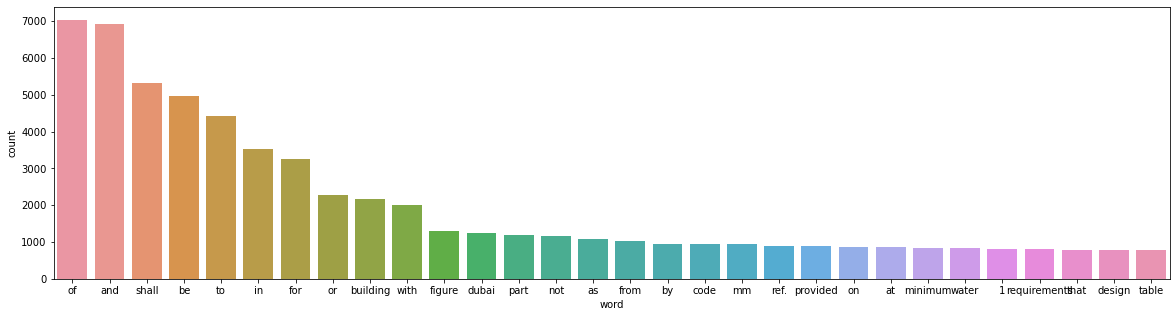

In [57]:
freq_words(df_sc_copy['Sentences'])   #Before

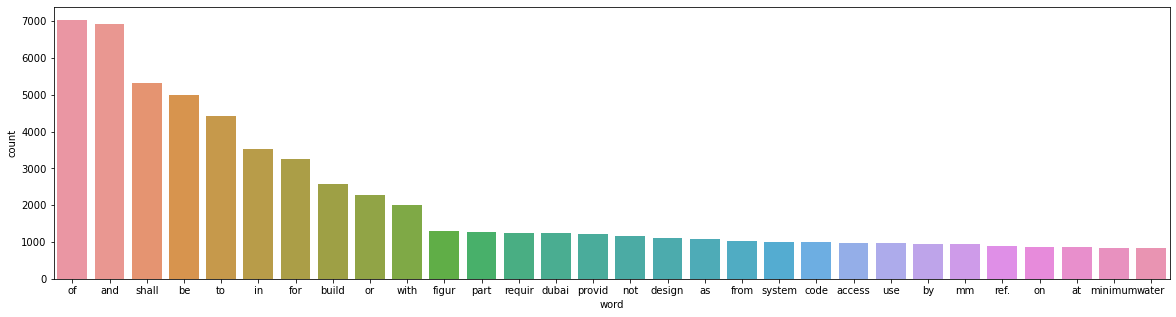

In [58]:
freq_words(df_sc_s['Sentences'])   #After

In [59]:
df_sc_s.head()

,Sentences,length,word_count,length_change,wordcount_change
0,dubai build code 2021 edit content part part b...,893,163,64,18
1,content of dbc base on follow input 1) exist r...,304,48,22,5
2,dbc arrang under theme to integr all relev ele...,209,37,37,10
3,2 dubai build code part gener a.2 definit note...,160,29,12,4
4,a.2.1 term addit increas to building’ gross ar...,89,15,3,1


In [61]:
df_sc_s['length_change'] = df_sc_copy['length']-df_sc_s['length']
df_sc_s['wordcount_change'] = df_sc_copy['word_count']-df_sc_s['word_count']
df_sc_s.to_csv('df_sc_s.csv')